<a href="https://colab.research.google.com/github/arielle00/CMPE257-Fall23-Arielle-Shnayder/blob/homework2/HW2_Task2_allbutE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random


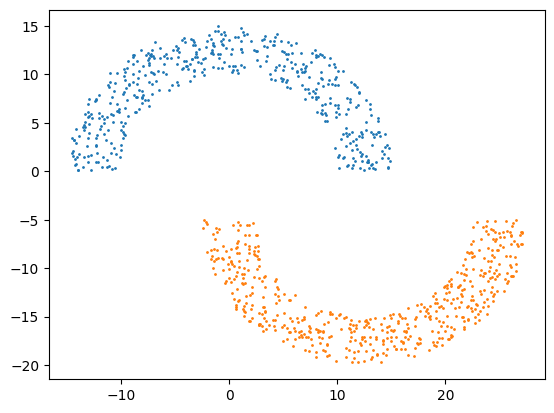

In [86]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]
y_class_top = [1 for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]
y_class_bottom = [-1 for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [87]:
x1 = X1 + X2
x2 = Y1 + Y2
y = y_class_top + y_class_bottom

df = pd.DataFrame({'X1': x1, 'X2': x2, 'Y':y})
df.insert(0,"X0",[1 for i in range(len(y))])

print(df)

     X0         X1         X2  Y
0     1  -4.072459  13.366002  1
1     1  14.796661   2.400083  1
2     1  11.821884   8.681003  1
3     1  13.753166   4.101411  1
4     1  -3.920818  10.895465  1
..   ..        ...        ... ..
995   1  19.581965 -13.893219 -1
996   1   8.068219 -19.194664 -1
997   1  11.368298 -19.740155 -1
998   1   3.236490 -15.155553 -1
999   1  19.447585 -15.417669 -1

[1000 rows x 4 columns]


In [88]:
def get_sign(x, w):
  dot_product = (x[0]*w[0] + x[1]*w[1] + x[2]*w[2])
  return sign(dot_product)

def sign(x):
  if(x>=0):
    return 1
  else:
    return -1

In [89]:
def check_for_misclassified(w):
  misclassified = {}
  signs = np.sign(df.iloc[:, :3].values @ w)
  y = df.iloc[:, 3].values

  mismatches = np.where(signs != y)[0]
  for mismatch in mismatches:
      misclassified[mismatch] = signs[mismatch]
  return misclassified

# def check_for_misclassified(w):
#   misclassified = {}
#   classified_on_current_w_line = []
#   for i in range (df.shape[0]):
#     classified_on_current_w_line.append(get_sign(df.iloc[i],w))

#     if(classified_on_current_w_line[i]!=y[i]):
#         misclassified[i] = classified_on_current_w_line[i]

#   return misclassified


PLA
This is how many iterations it takes: 13
This is the final weight:  [ 7.         -0.85828061 51.05555343]


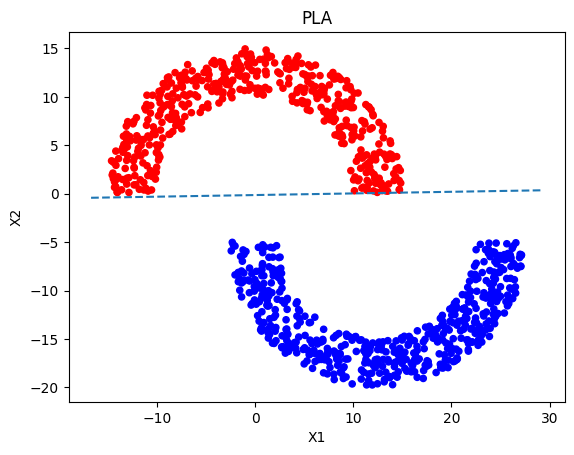

In [90]:
def plot_graph(w, msg):
  col = df['Y'].map({-1:'b', 1:'r'})
  df.plot.scatter(x='X1', y='X2', c=col)
  axes = plt.gca()
  x_vals = np.array(axes.get_xlim())
  y_vals = np.array(axes.get_ylim())
  y_vals = -w[0]/w[2] - w[1]/w[2] * x_vals
  plt.title(msg)
  plt.plot(x_vals, y_vals, '--')


def perceptron():
  w = [0,0,0]
  misclassified = check_for_misclassified(w)
  i=0

  while(len(misclassified)!=0 and i<100):
    list_of_misclass = random.choice(list(misclassified.keys()))
    x = df.iloc[list_of_misclass][:3].values
    y = df.iloc[list_of_misclass][3]

    w = w + x*y

    misclassified = check_for_misclassified(w)
    i=i+1
  print("PLA")
  print("This is how many iterations it takes:",i)
  print("This is the final weight: ",w)
  plot_graph(w, "PLA")

w = perceptron()

LR
This is the final weight:  [ 0.25605028 -0.0098336   0.077651  ]


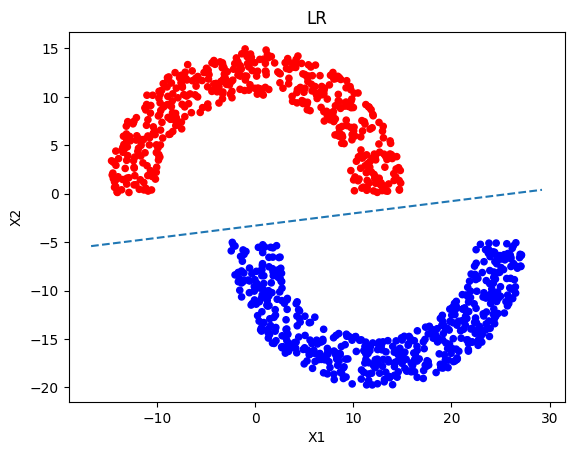

In [91]:
matrix_X = df.iloc[:, :3].values
matrix_Y = df.iloc[:, -1].values


# Linear Regression
def LR():
  XT = np.transpose(matrix_X)
  XtX = np.matmul(XT,matrix_X)
  X_inv = np.linalg.inv(XtX)
  X_pi = np.matmul(X_inv,XT)
  W = np.matmul(X_pi, matrix_Y)
  return W


w = LR()
print("LR")
# print("This is how many iterations it takes:",i)
print("This is the final weight: ",w)
plot_graph(w, "LR")

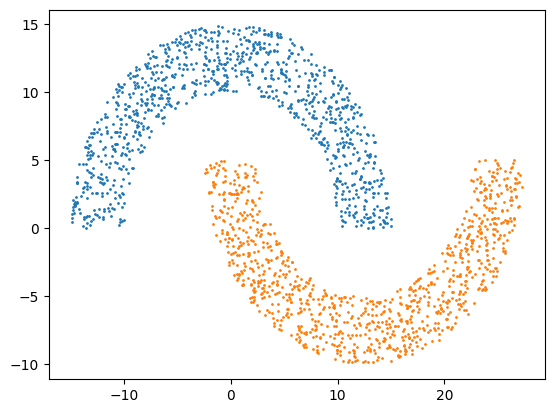

PLA
This is how many iterations it takes: 100
This is the final weight:  [-14.          -1.84938033  12.96858474]


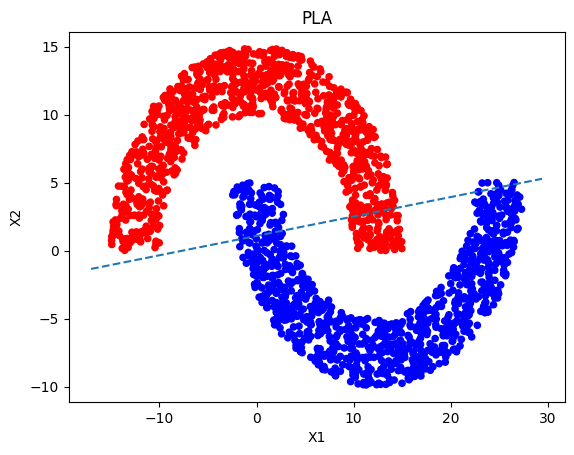

In [92]:
# Task 2 LP 2

#parameters
rad = 10
thk = 5
sep = -5

top,bottom = generatedata(rad,thk,sep,2000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]
y_class_top = [1 for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]
y_class_bottom = [-1 for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

x1 = X1 + X2
x2 = Y1 + Y2
y = y_class_top + y_class_bottom

df = pd.DataFrame({'X1': x1, 'X2': x2, 'Y':y})
df.insert(0,"X0",[1 for i in range(len(y))])

# print(df)

perceptron()

Pocket
Ein 0.08500914999999998
This is the final weight:  [-1.         -0.11171149  0.80335482]


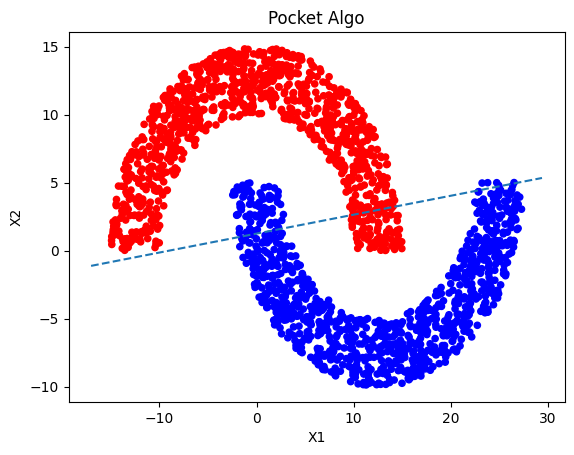

In [93]:
Ein_list = []

def pocketAlgo(misclassified_method, w_pocket):
  misclassified = misclassified_method(w_pocket)
  i=0

  while(len(misclassified)!=0 and i<100000):
      list_of_misclass = random.choice(list(misclassified))
      # print(len(misclassified))
      Ein = len(misclassified)/len(df)
      Ein_list.append(Ein)

      #list_of_misclass = list(misclassified.keys())[0]
      x = df.iloc[list_of_misclass][:3].values
      y = df.iloc[list_of_misclass][3]

      w_maybeNew = w_pocket + x*y

      misclassified_new = misclassified_method(w_maybeNew)

      if len(misclassified_new) <= len(misclassified):
          w_pocket = w_maybeNew.copy()
          misclassified = misclassified_new
          # misclassified = misclassified_new
      else:
          misclassified = misclassified_method(w_pocket)
      i=i+1
      # misclassified = misclassified_method(w_pocket)

  print("Pocket")
  print("Ein",np.mean(Ein_list))
  print("This is the final weight: ",w_pocket)

  plot_graph(w_pocket, "Pocket Algo")

# pocketAlgo()
w_pocket = [0,0,0]
pocketAlgo(check_for_misclassified, w_pocket)

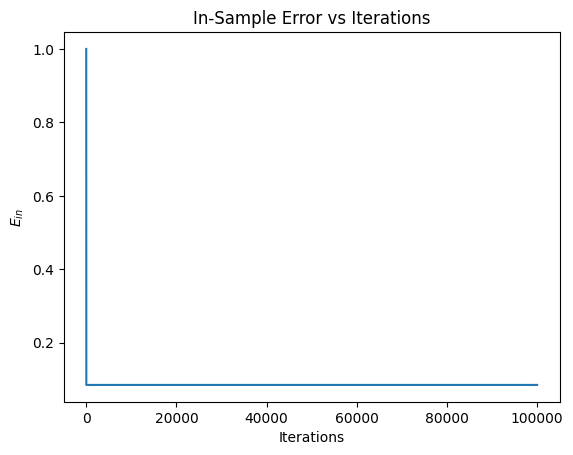

In [94]:
# Plot Ein vs Iteration
def plot_Ein_iteration():
    plt.plot(Ein_list)
    plt.xlabel('Iterations')
    plt.ylabel('$E_{in}$')
    plt.title('In-Sample Error vs Iterations')
    plt.show()

plot_Ein_iteration()

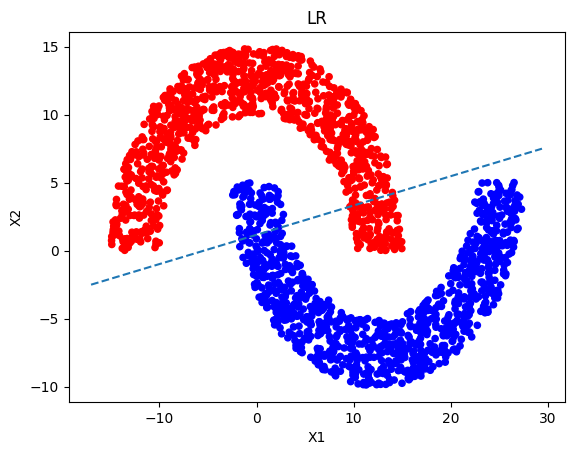

In [95]:
# TASK 2 HP d)
matrix_X = df.iloc[:, :3].values
matrix_Y = df.iloc[:, -1].values
w = LR()
w
plot_graph(w, "LR")
